<a href="https://colab.research.google.com/github/ShedovaNastya/Face-Recognition-Project/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT MODULE

In [ ]:
import torch
import os
from IPython.display import clear_output
import numpy as np
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.models import list_models, get_model
from tqdm.notebook import tqdm as bar
from copy import deepcopy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/celebA_train_500.zip
clear_output()

#DATASET

In [ ]:
class FaceDataset(torch.utils.data.Dataset):

    def __init__(self, images_folder, label_folder, sample_folder, type_dataset, transform):
      """
      image_folder: путь до папки с изображениями
      label_folder: путь до файла, где какой человек находится
      sample_folder: путь до файла к какому датасету относится конкретное изображение
      type_dataset: датасет, который нас сейчас интересует
      transform: преобразование изображения
      """
      self.images_folder = images_folder
      self.label_folder = label_folder
      self.sample_folder = sample_folder
      self.type_dataset = type_dataset
      self.transform = transform


      with open(self.label_folder, 'r') as file: #человек
        self.labels = {}
        for i in file.readlines():
          key, value = i.split()
          self.labels[key] = int(value)

      with open(self.sample_folder, 'r') as file: #классификация датасетов
        self.samples = {}
        for i in file.readlines():
          key, value = i.split()
          self.samples[key] = int(value)

      self.files = [i for i in os.listdir(self.images_folder) if self.samples.get(i, 5) == self.type_dataset]

    def __len__(self):
      return len(self.files)

    def __getitem__(self, idx):
      image_name = self.images_folder + self.files[idx]
      image = np.array(Image.open(image_name))
      image = Image.fromarray(image[77:-41,45:-50])
      label = int(self.labels[self.files[idx]])
      image = self.transform(image)
      return image, label




In [ ]:
train_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            0,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))
val_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            1,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))
test_dataset = FaceDataset('/content/celebA_train_500/celebA_imgs/',
                            '/content/celebA_train_500/celebA_anno.txt',
                            '/content/celebA_train_500/celebA_train_split.txt',
                            2,
                            T.Compose([
                                T.Resize((224, 224)), T.ToTensor()
                            ]))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 30, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 30, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = 30, shuffle = False)

In [ ]:
list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

#MODEL 1 EfficientNet_B2_Weights.IMAGENET1K_V1

In [ ]:
m1 = get_model("efficientnet_b2", weights="IMAGENET1K_V1")
m1

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

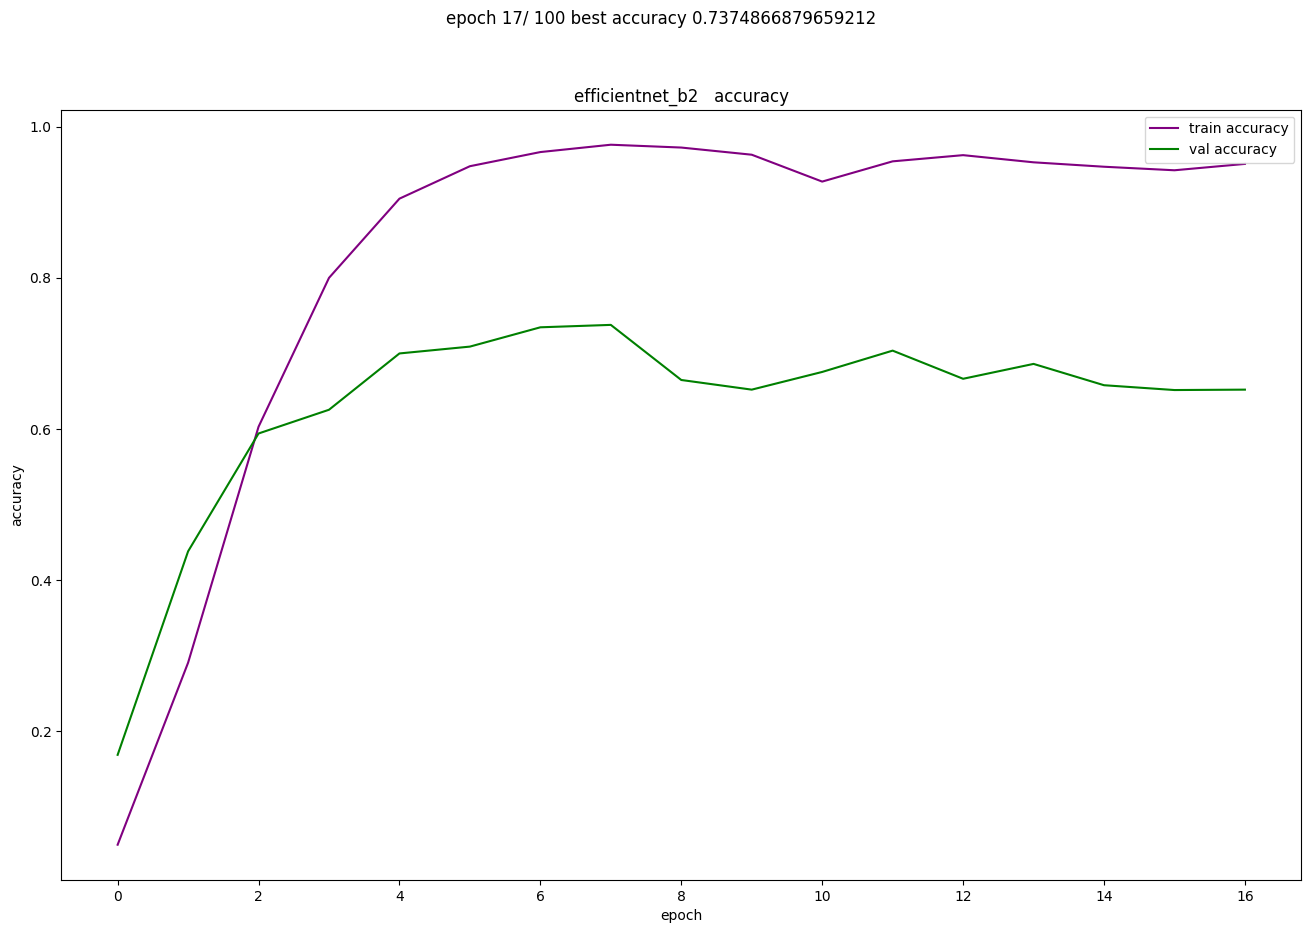

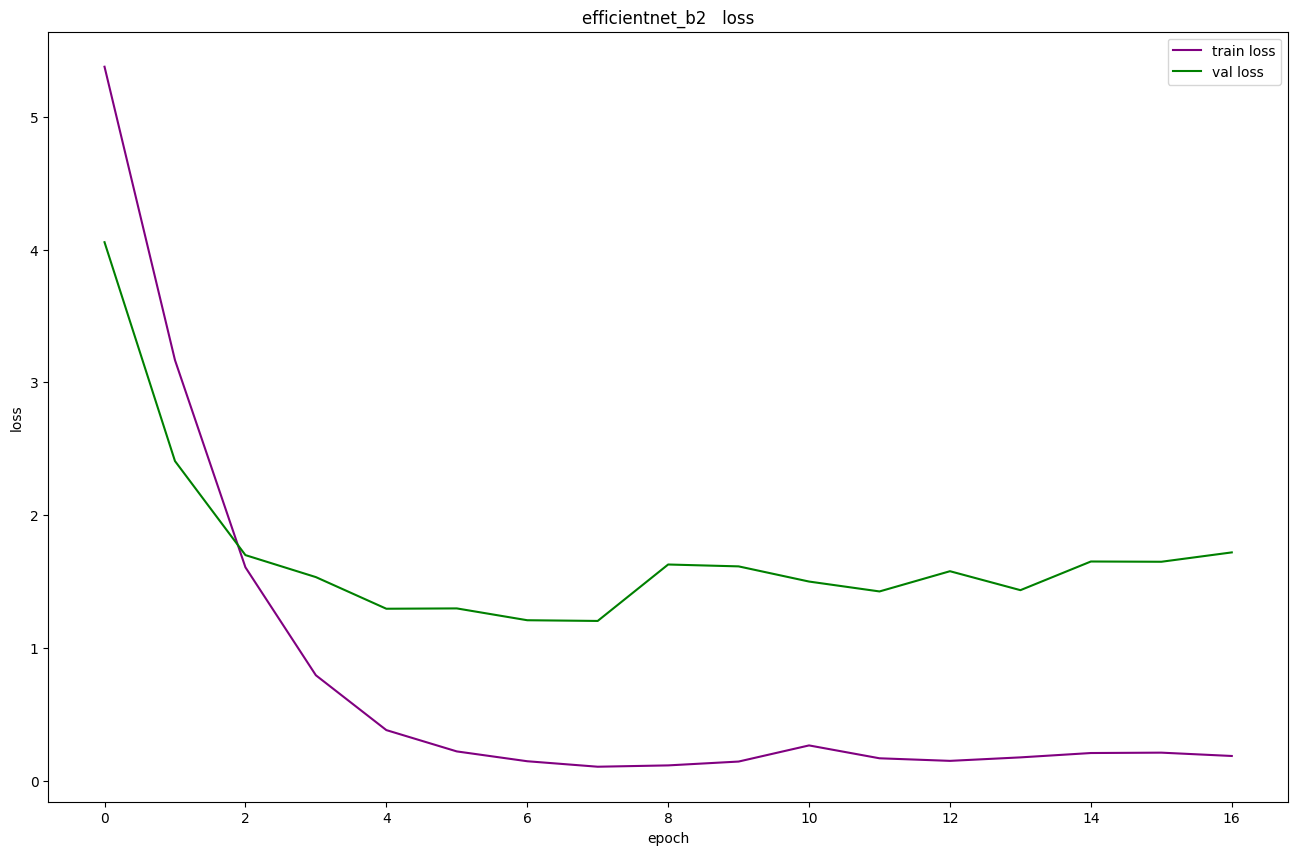

epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m1 = get_model("efficientnet_b2", weights="IMAGENET1K_V1")
m1.classifier[1] = torch.nn.Linear(in_features=1408, out_features=500, bias=True)
m1 = m1.to(device)
optimizer = torch.optim.Adam(m1.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m1.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m1(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m1.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m1(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m1.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('efficientnet_b2   accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('efficientnet_b2   loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/efficientnet_b2_param_m1.pth'
  torch.save(best_state, filename)
  m1.load_state_dict(torch.load(filename))
  m1.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m1(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  correct/len(test_dataset)






#MODEL 2 RegNet_Y_1_6GF_Weights.IMAGENET1K_V2

In [ ]:
m2 = get_model("regnet_y_1_6gf", weights="IMAGENET1K_V2")
m2

Downloading: "https://download.pytorch.org/models/regnet_y_1_6gf-0d7bc02a.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_1_6gf-0d7bc02a.pth
100%|██████████| 43.2M/43.2M [00:16<00:00, 2.74MB/s]


RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 48, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=2, bias=False)
            

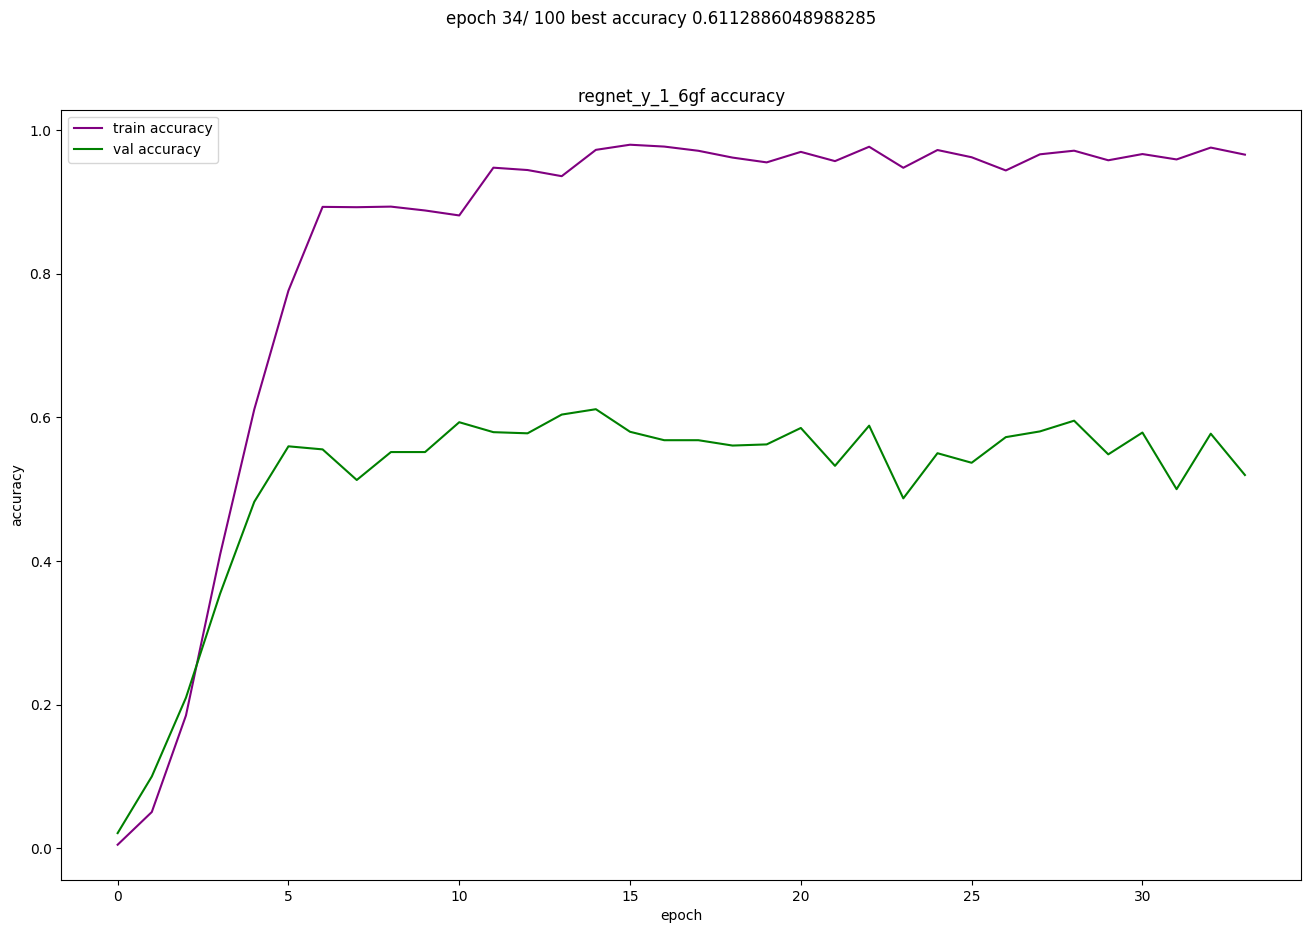

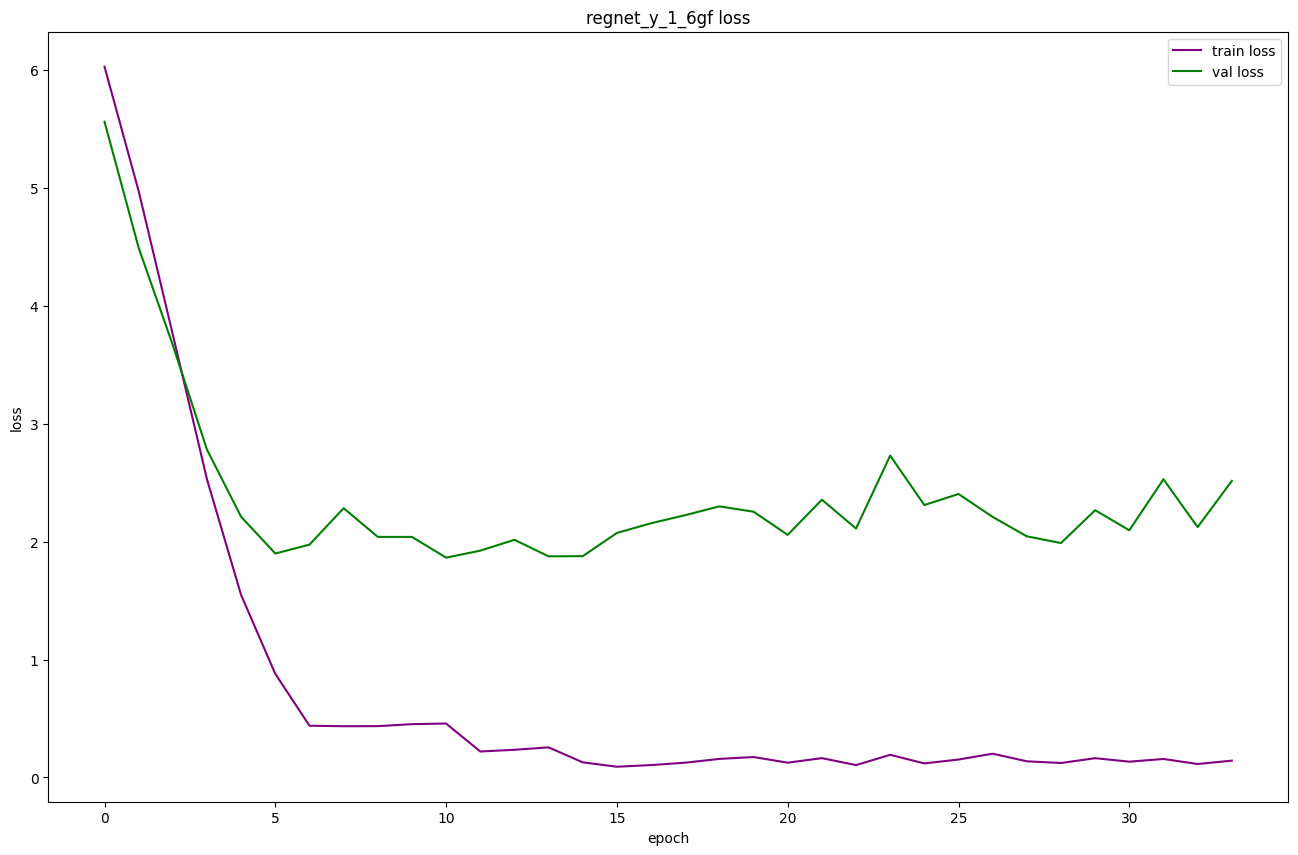

0.6142227816236627


epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m2 = get_model("regnet_y_1_6gf", weights="IMAGENET1K_V2")
m2.fc = torch.nn.Linear(in_features=888, out_features=500, bias=True)
m2 = m2.to(device)
optimizer = torch.optim.Adam(m2.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m2.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m2(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m2.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m2(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m2.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('regnet_y_1_6gf accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('regnet_y_1_6gf loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/regnet_y_1_6gf_param_m2.pth'
  torch.save(best_state, filename)
  m2.load_state_dict(torch.load(filename))
  m2.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m2(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  print(correct/len(test_dataset))





#MODEL 3 MobileNet_V3_Large_Weights.IMAGENET1K_V2

In [ ]:
m3 = get_model("mobilenet_v3_large", weights="IMAGENET1K_V2")
m3

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 117MB/s] 


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

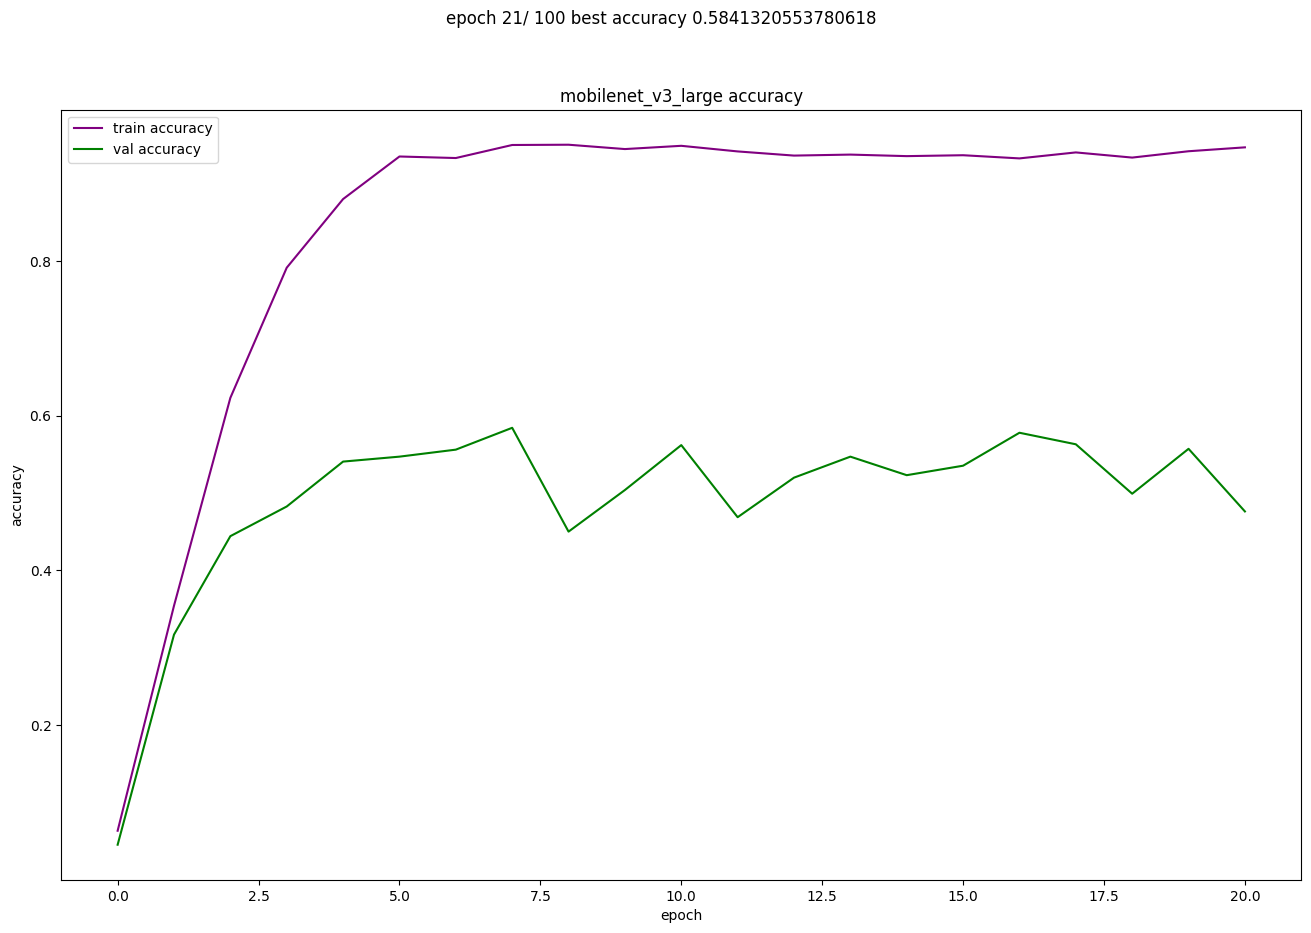

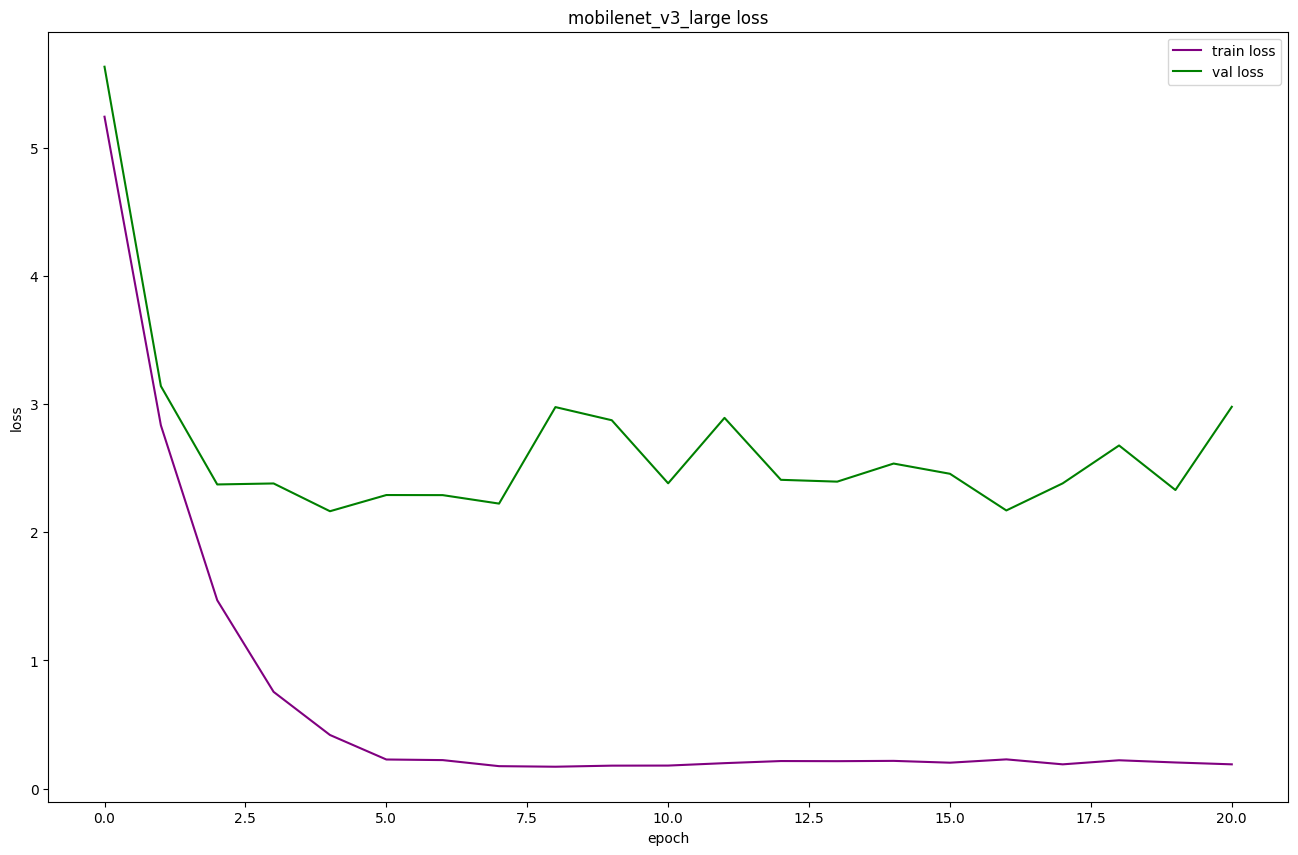

epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m3 = get_model("mobilenet_v3_large", weights="IMAGENET1K_V2")
m3.classifier[3] = torch.nn.Linear(in_features=1280, out_features=500, bias=True)
m3 = m3.to(device)
optimizer = torch.optim.Adam(m3.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m3.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m3(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m3.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m3(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m3.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('mobilenet_v3_large accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('mobilenet_v3_large loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/mobilenet_v3_large_param_m3.pth'
  torch.save(best_state, filename)
  m3.load_state_dict(torch.load(filename))
  m3.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m3(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  correct/len(test_dataset)





#MODEL 4 RegNet_Y_800MF_Weights.IMAGENET1K_V2

In [ ]:
m4 = get_model("regnet_y_800mf", weights="IMAGENET1K_V2")
m4

Downloading: "https://download.pytorch.org/models/regnet_y_800mf-58fc7688.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_800mf-58fc7688.pth
100%|██████████| 24.8M/24.8M [00:00<00:00, 114MB/s]


RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=4, bias=False)
            

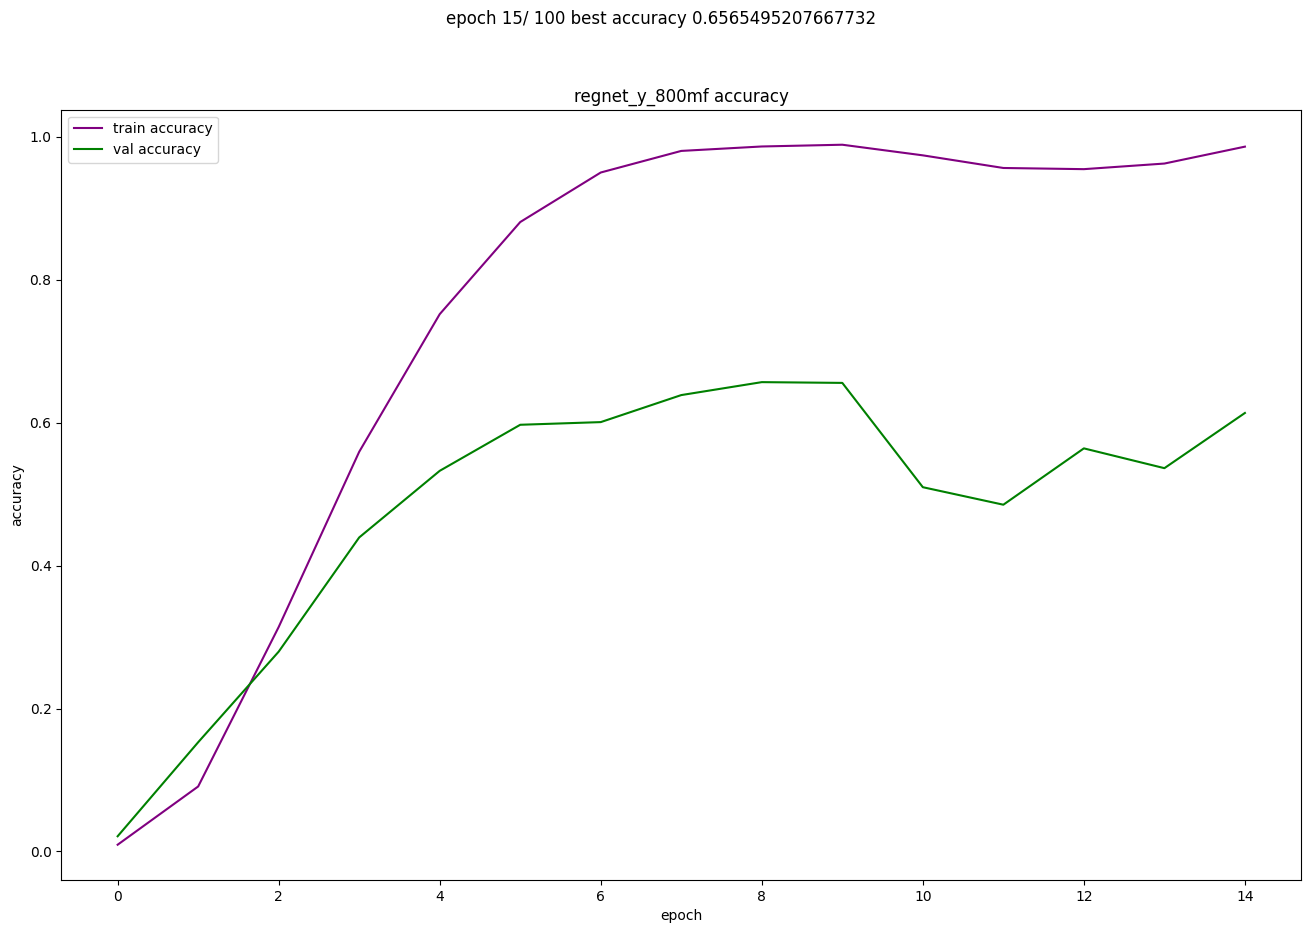

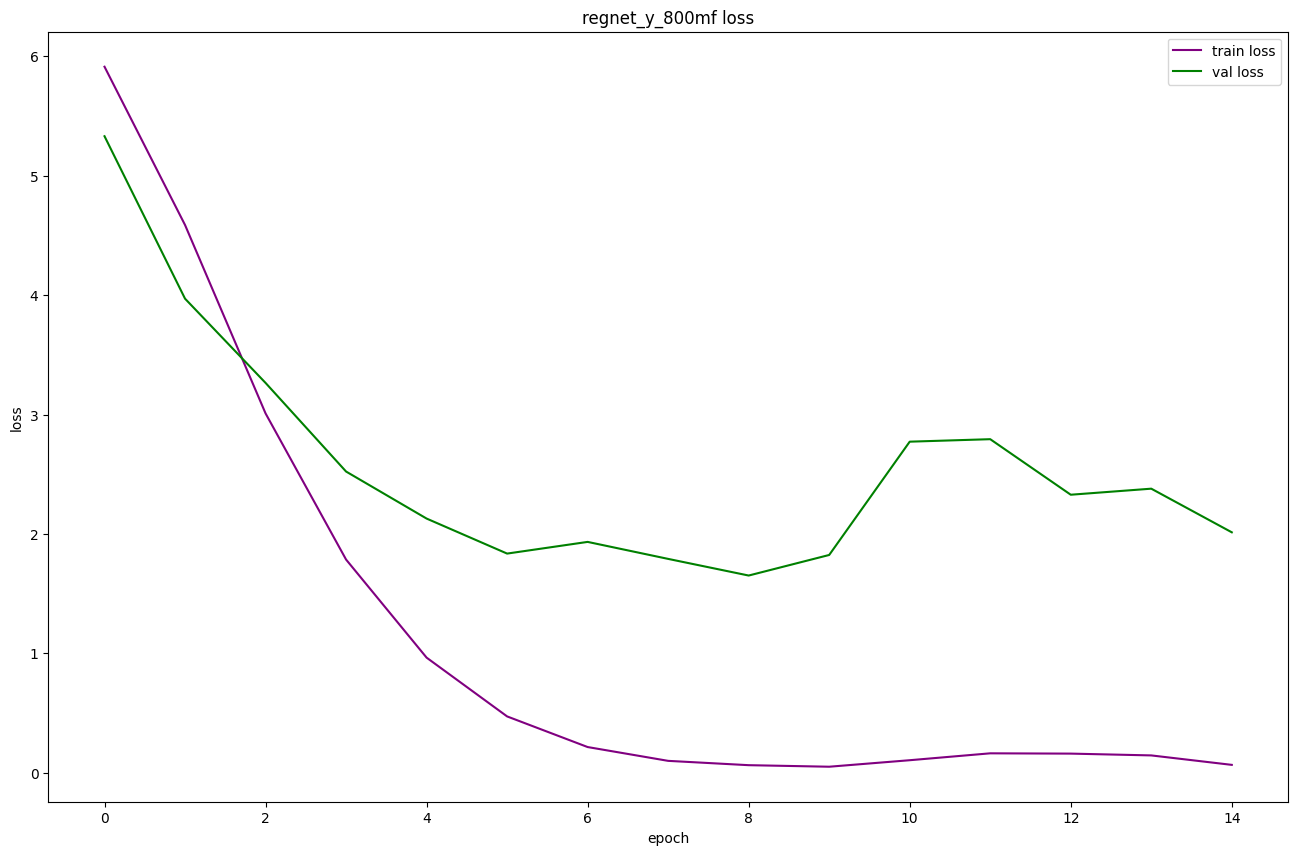

epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m4 = get_model("regnet_y_800mf", weights="IMAGENET1K_V2")
m4.fc = torch.nn.Linear(in_features=784, out_features=500, bias=True)
m4 = m4.to(device)
optimizer = torch.optim.Adam(m4.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m4.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m4(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m4.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m4(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m4.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('regnet_y_800mf accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('regnet_y_800mf loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/regnet_y_800mf_param_m4.pth'
  torch.save(best_state, filename)
  m4.load_state_dict(torch.load(filename))
  m4.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m4(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  correct/len(test_dataset)





#MODEL 5 ShuffleNet_V2_X2_0_Weights.IMAGENET1K_V1

In [ ]:
m5 = get_model("shufflenet_v2_x2_0", weights="IMAGENET1K_V1")
m5

Downloading: "https://download.pytorch.org/models/shufflenetv2_x2_0-8be3c8ee.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x2_0-8be3c8ee.pth
100%|██████████| 28.4M/28.4M [00:00<00:00, 82.5MB/s]


ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_runn

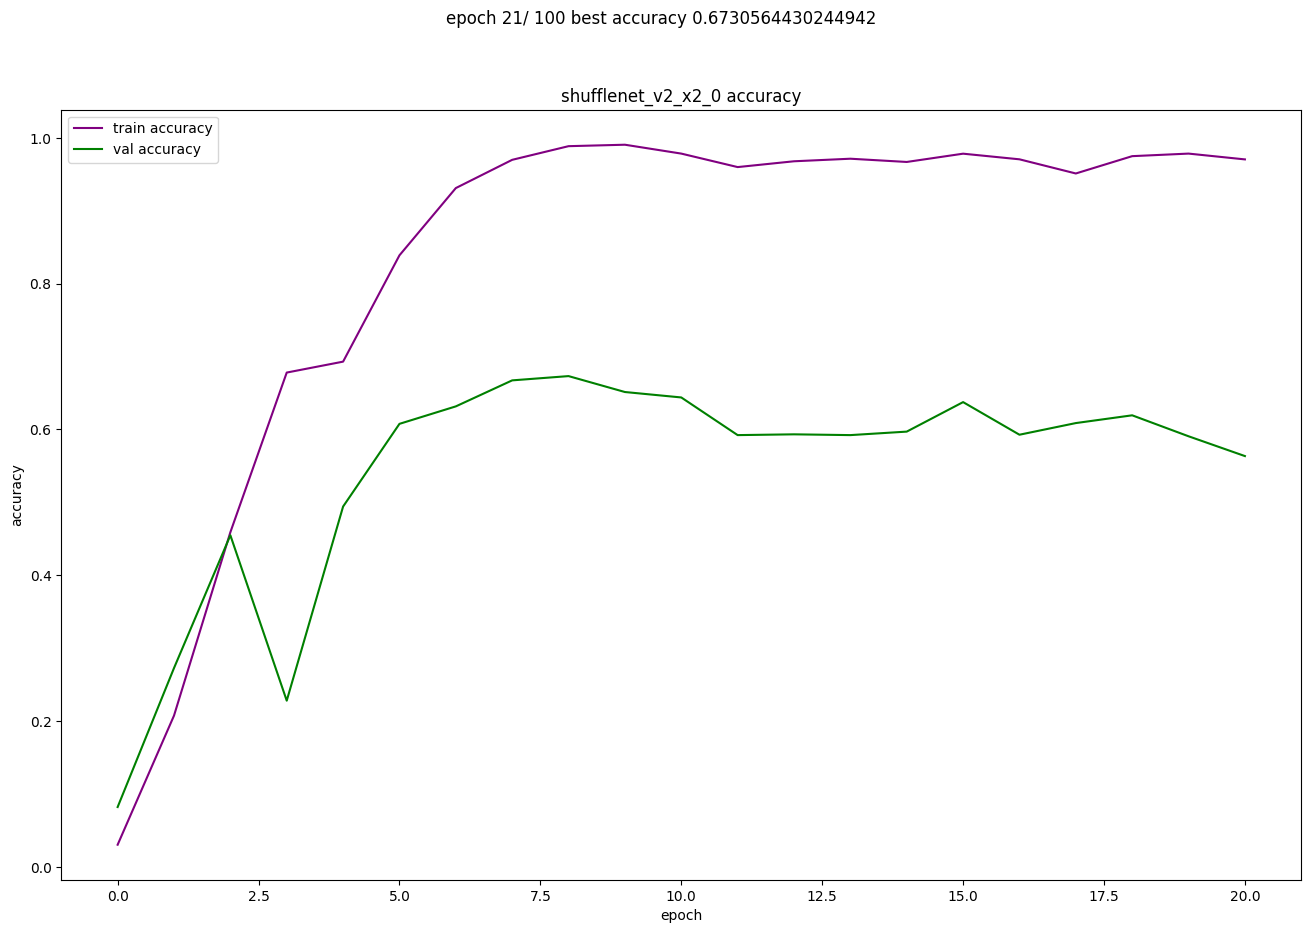

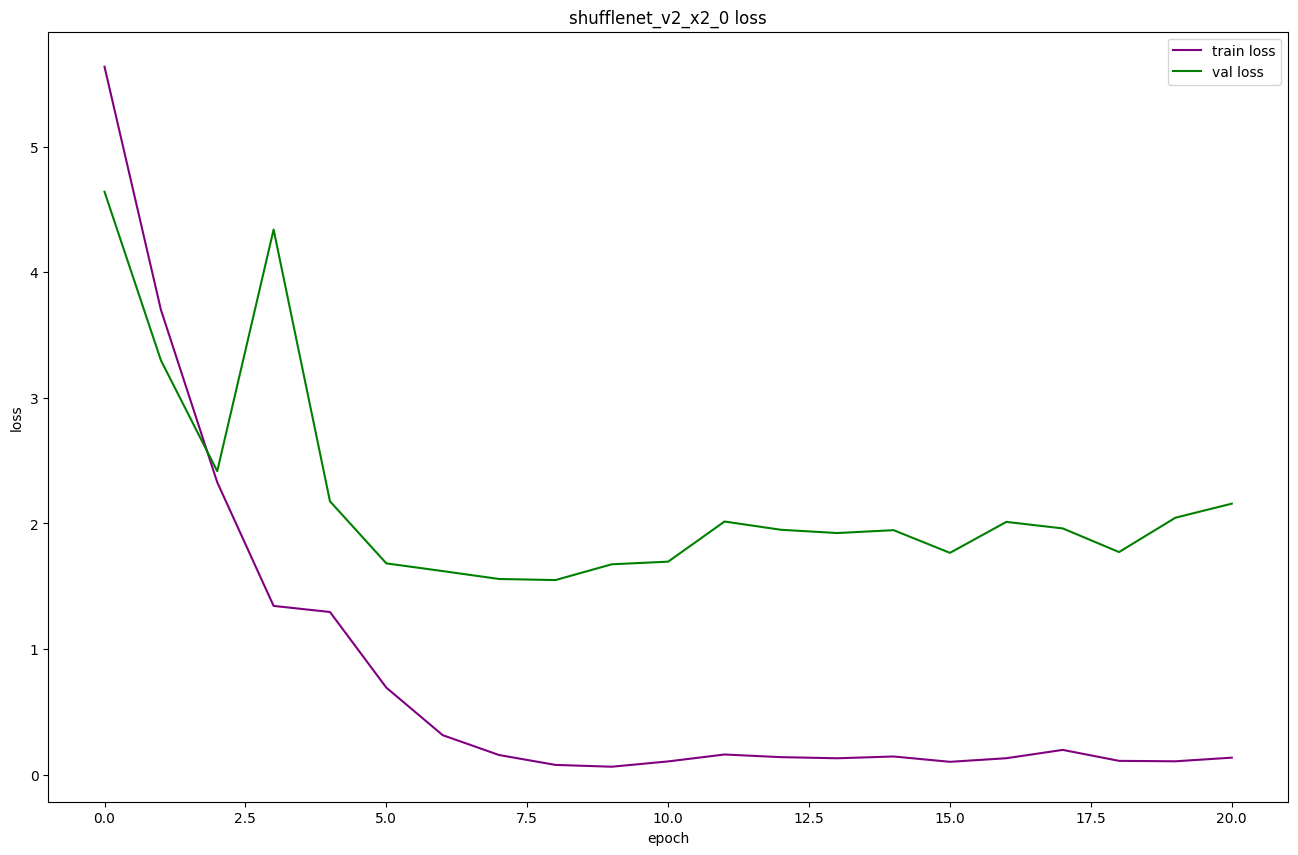

epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m5 = get_model("shufflenet_v2_x2_0", weights="IMAGENET1K_V1")
m5.fc = torch.nn.Linear(in_features=2048, out_features=500, bias=True)
m5 = m5.to(device)
optimizer = torch.optim.Adam(m5.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m5.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m5(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m5.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m5(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m5.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('shufflenet_v2_x2_0 accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('shufflenet_v2_x2_0 loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/shufflenet_v2_x2_0_param_m5.pth'
  torch.save(best_state, filename)
  m5.load_state_dict(torch.load(filename))
  m5.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m5(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  correct/len(test_dataset)





#MODEL 6 RegNet_X_400MF_Weights.IMAGENET1K_V2

In [ ]:
m6 = get_model("regnet_x_400mf", weights="IMAGENET1K_V2")
m6

Downloading: "https://download.pytorch.org/models/regnet_x_400mf-62229a5f.pth" to /root/.cache/torch/hub/checkpoints/regnet_x_400mf-62229a5f.pth
100%|██████████| 21.3M/21.3M [00:02<00:00, 7.52MB/s]


RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=2, bias=False)
            

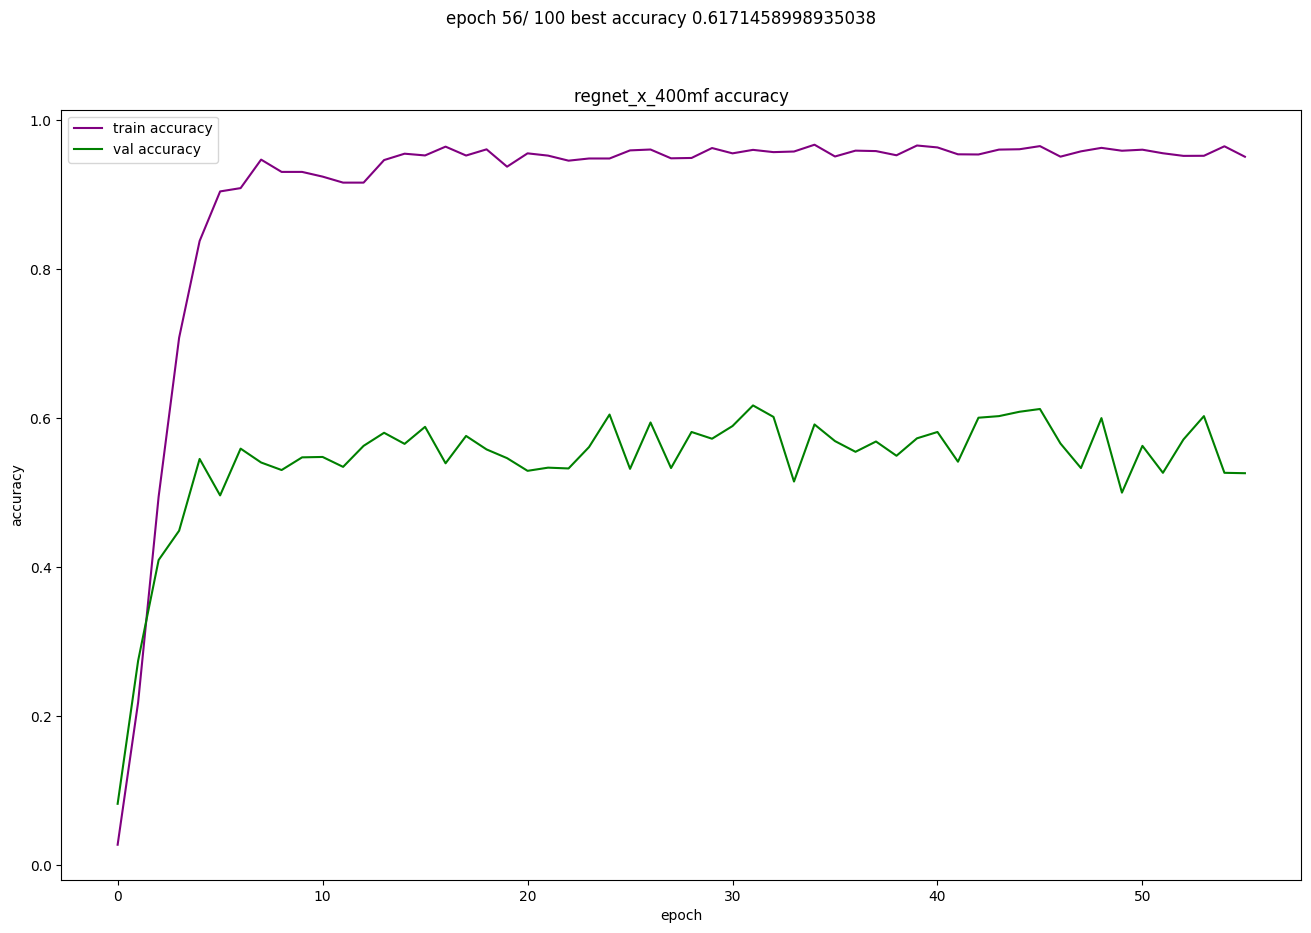

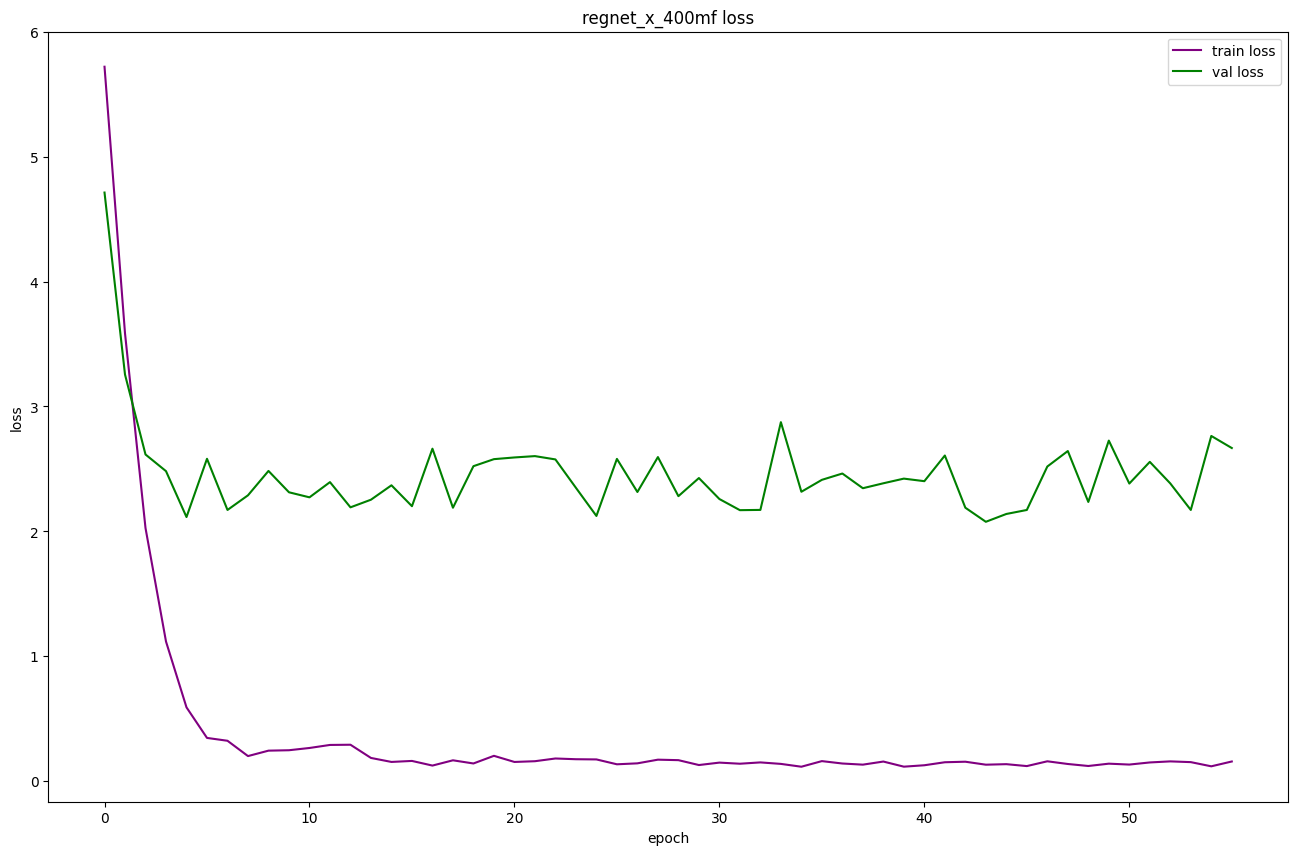

0.6217747010698552


epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m6 = get_model("regnet_x_400mf", weights="IMAGENET1K_V2")
m6.fc = torch.nn.Linear(in_features=400, out_features=500, bias=True)
m6 = m6.to(device)
optimizer = torch.optim.Adam(m6.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m6.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m6(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m6.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m6(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m6.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('regnet_x_400mf accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('regnet_x_400mf loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/regnet_x_400mf_param_m6.pth'
  torch.save(best_state, filename)
  m6.load_state_dict(torch.load(filename))
  m6.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m6(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  print(correct/len(test_dataset))





#MODEL 7 MNASNet1_0_Weights.IMAGENET1K_V1

In [ ]:
m7 = get_model("mnasnet1_0", weights="IMAGENET1K_V1")
m7

Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to /root/.cache/torch/hub/checkpoints/mnasnet1.0_top1_73.512-f206786ef8.pth
100%|██████████| 16.9M/16.9M [00:00<00:00, 162MB/s]


MNASNet(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (8): Sequential(
      (0): _InvertedResidual(
        (layers): Sequential(
          (0): Conv2d(16, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(48, 

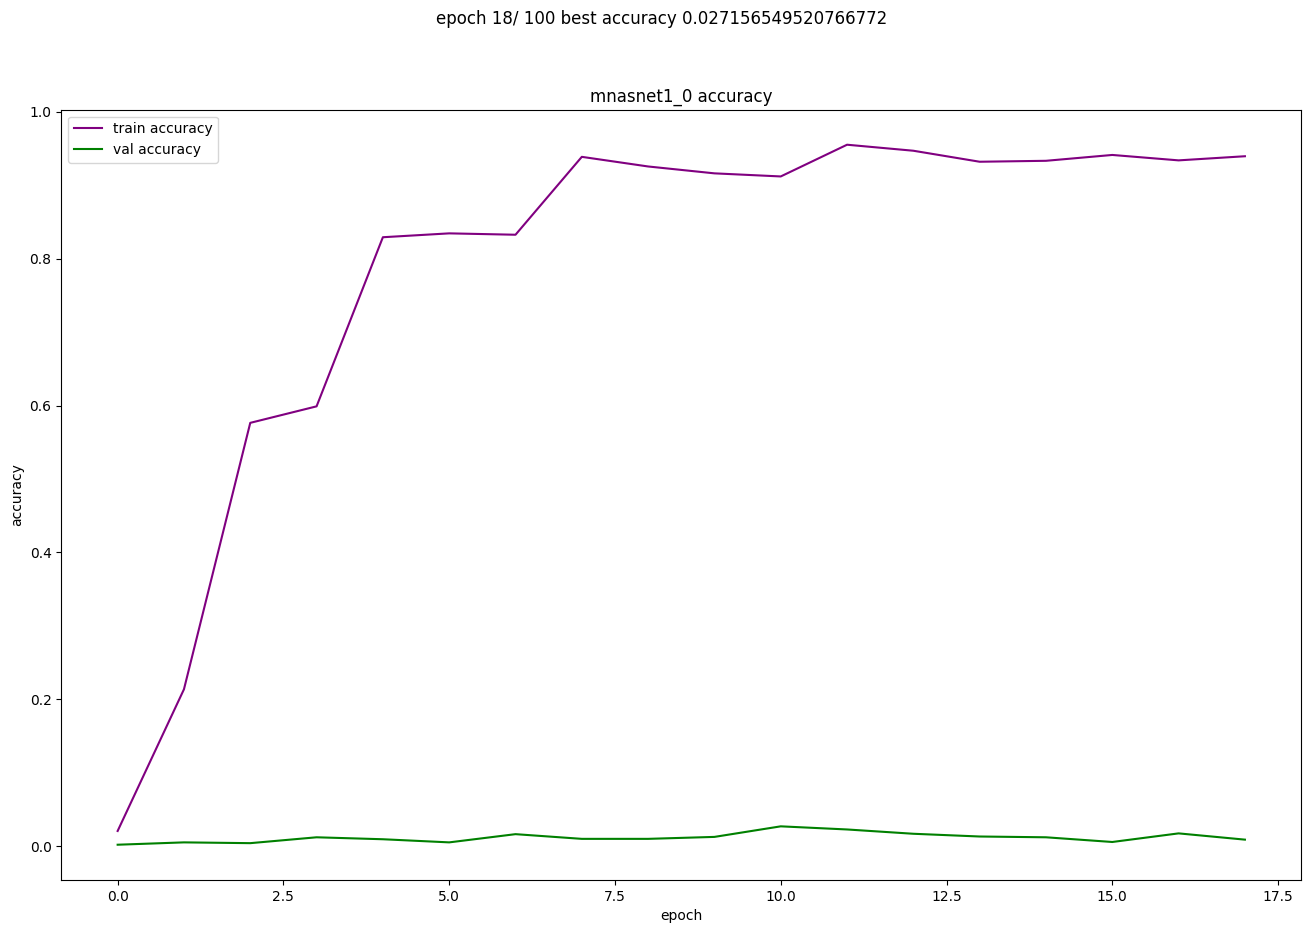

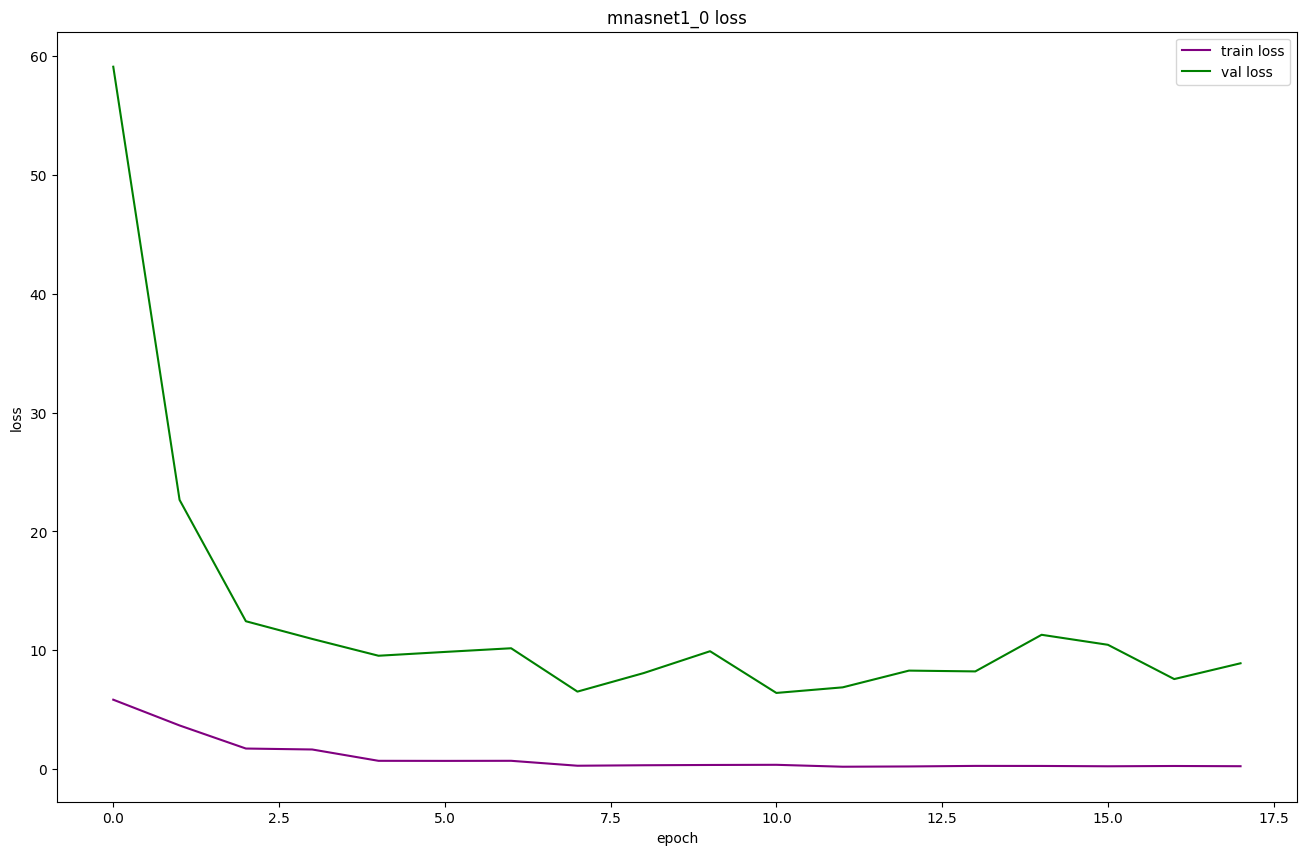

0.01825047199496539


epoch:   0%|          | 0/285 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m7 = get_model("mnasnet1_0", weights="IMAGENET1K_V1")
m7.classifier[1] = torch.nn.Linear(in_features=1280, out_features=500, bias=True)
m7 = m7.to(device)
optimizer = torch.optim.Adam(m7.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m7.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m7(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m7.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m7(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m7.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('mnasnet1_0 accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('mnasnet1_0 loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/mnasnet1_0_param_m7.pth'
  torch.save(best_state, filename)
  m7.load_state_dict(torch.load(filename))
  m7.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m7(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  print(correct/len(test_dataset))





#MODEL 8 EfficientNet_B3_Weights.IMAGENET1K_V1

In [ ]:
m8= get_model("efficientnet_b3", weights="IMAGENET1K_V1")
m8

Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 80.7MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

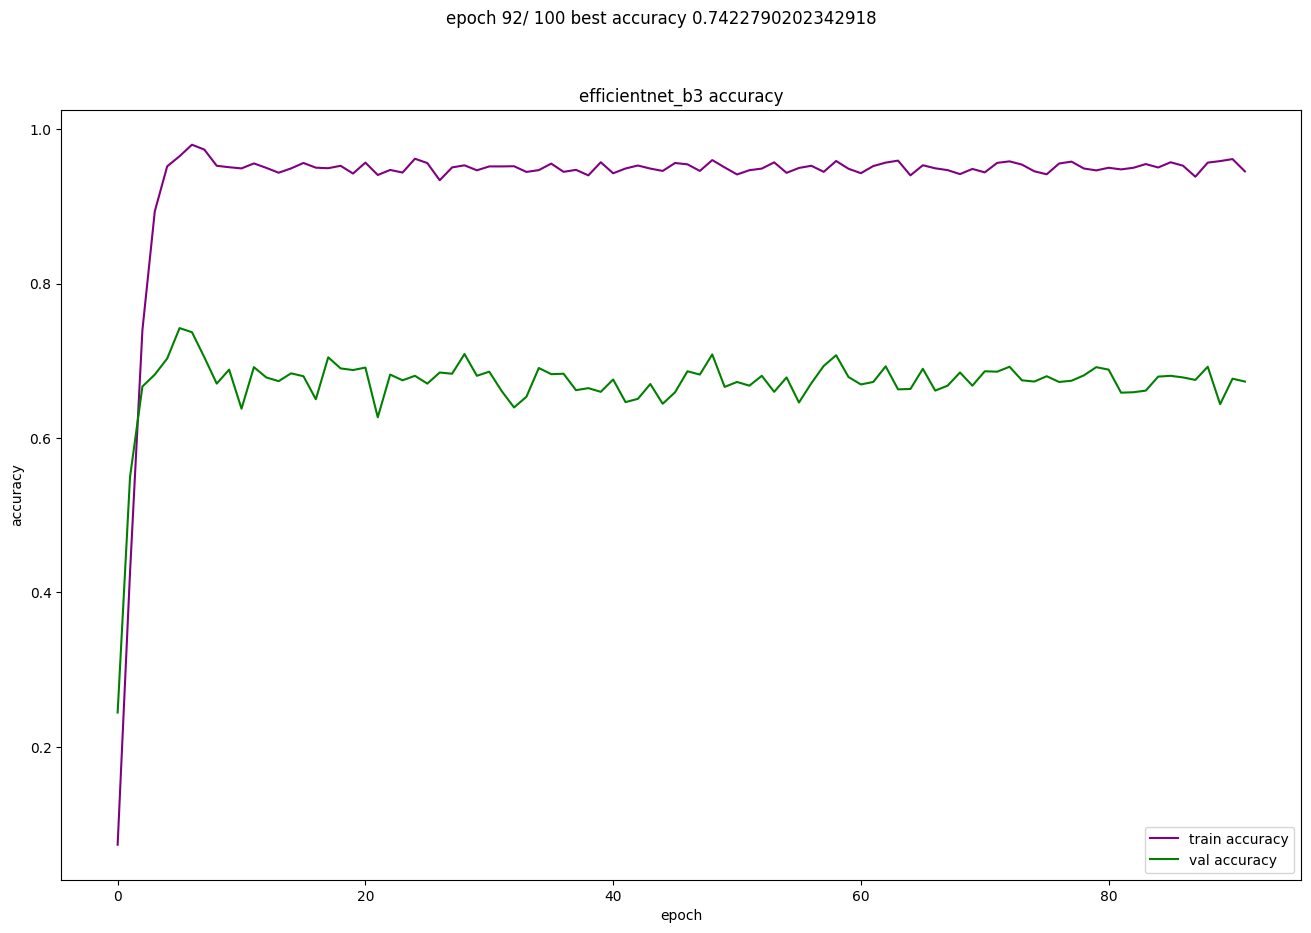

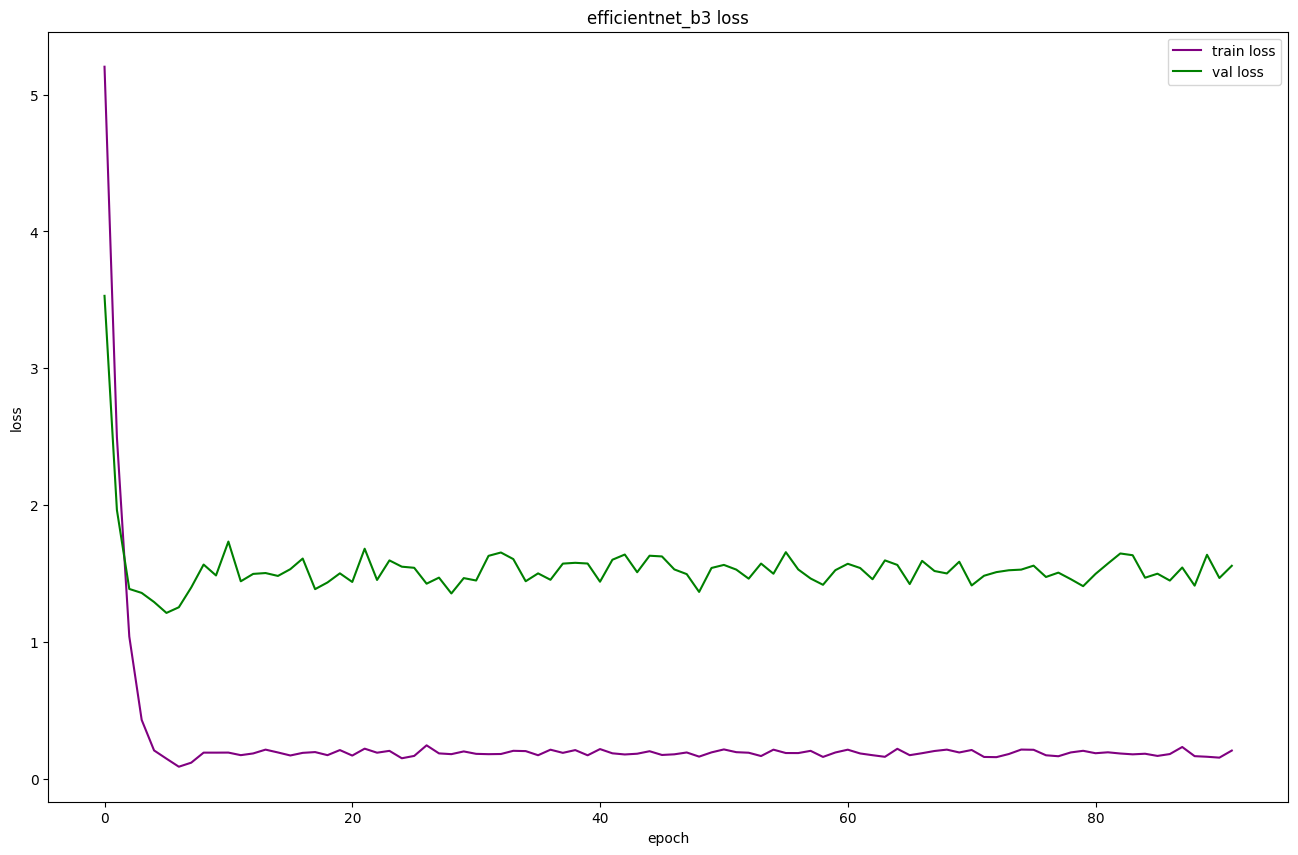

0.7432347388294525


epoch:   0%|          | 0/285 [00:00<?, ?it/s]

In [ ]:
epoches = 100
batch_size = 2640

loss_fn = torch.nn.CrossEntropyLoss()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

m8 = get_model("efficientnet_b3", weights="IMAGENET1K_V1")
m8.classifier[1] = torch.nn.Linear(in_features=1536, out_features=500, bias=True)
m8 = m8.to(device)
optimizer = torch.optim.Adam(m8.parameters())


train_accuracy_history = []
val_accuracy_history = []

train_loss_history = []
val_loss_history = []
best_acc = 0
best_state = None # веса


for epoch in bar(range(epoches), desc='learning'):
  m8.train()
  loss_epoch= 0
  correct = 0
  for data, label in bar(train_loader, desc = 'epoch'):
    data = data.to(device)#30 картинок
    label = label.to(device)#30 людей

    optimizer.zero_grad()
    outputs = m8(data)
    loss = loss_fn(outputs, label)
    loss.backward()

    optimizer.step()
    loss_epoch += loss.item()#скалярное значение loss
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == label).sum().item()


  train_accuracy_history.append(correct/len(train_dataset))#для каждого изображения
  train_loss_history.append(loss_epoch / len(train_loader))#для одного лоадера


  m8.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in bar(val_loader, desc = 'epoch'):
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m8(data)
      loss = loss_fn(outputs, label)

      loss_epoch += loss.item()#скалярное значение loss
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()


  val_accuracy_history.append(correct/len(val_dataset))#для каждого изображения
  val_loss_history.append(loss_epoch / len(val_loader))#для одного лоадера

  if best_acc < val_accuracy_history[-1]:
    best_acc = val_accuracy_history[-1]
    best_state = deepcopy(m8.state_dict())


  clear_output()
  plt.figure(figsize=(16,10))
  plt.suptitle(f'epoch {epoch+1}/ {epoches} best accuracy {best_acc}')
  plt.title('efficientnet_b3 accuracy')
  plt.plot(train_accuracy_history, label='train accuracy', color = 'purple')
  plt.plot(val_accuracy_history, label='val accuracy', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

  plt.figure(figsize=(16,10))
  # plt.suptitle(f'epoch {epoch+1}/ {epoches}  loss {loss_epoch}')
  plt.title('efficientnet_b3 loss')
  plt.plot(train_loss_history, label='train loss', color = 'purple')
  plt.plot(val_loss_history, label='val loss', color = 'green')
  plt.legend(loc='best')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

  filename = '/content/drive/MyDrive/efficientnet_b3_param_m8.pth'
  torch.save(best_state, filename)
  m8.load_state_dict(torch.load(filename))
  m8.eval()
  loss_epoch= 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(device)#30 картинок
      label = label.to(device)#30 людей

      outputs = m8(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == label).sum().item()
  print(correct/len(test_dataset))



